In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2023-06-23 23:01:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.6MB/s    in 24s     

2023-06-23 23:01:51 (20.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['598436.jpg']
Image shape:(512, 512, 3)


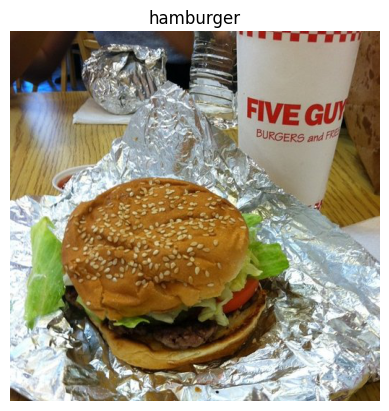

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 54s 224ms/step - loss: 2.1556 - accuracy: 0.2057 - val_loss: 2.0288 - val_accuracy: 0.2716
Epoch 2/10
235/235 [==============================] - 62s 265ms/step - loss: 1.9100 - accuracy: 0.3275 - val_loss: 1.9444 - val_accuracy: 0.3176
Epoch 3/10
235/235 [==============================] - 62s 263ms/step - loss: 1.4830 - accuracy: 0.4968 - val_loss: 2.0732 - val_accuracy: 0.3032
Epoch 4/10
235/235 [==============================] - 54s 228ms/step - loss: 0.7717 - accuracy: 0.7491 - val_loss: 2.6207 - val_accuracy: 0.2692
Epoch 5/10
235/235 [==============================] - 52s 222ms/step - loss: 0.2287 - accuracy: 0.9351 - val_loss: 3.8939 - val_accuracy: 0.2744
Epoch 6/10
235/235 [==============================] - 52s 222ms/step - loss: 0.0587 - accuracy: 0.9869 - val_loss: 5.1677 - val_accuracy: 0.2608
Epoch 7/10
235/235 [==============================] - 53s 225ms/step - loss: 0.0218 - accuracy: 0.9957 - val_loss: 6.3246 - val_ac

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 166ms/step - loss: 6.6114 - accuracy: 0.2400


[6.6114068031311035, 0.23999999463558197]

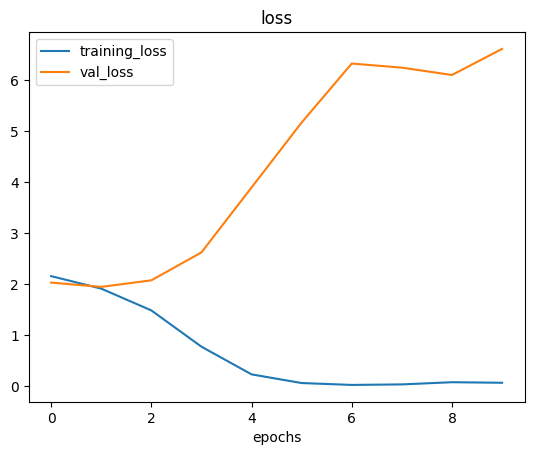

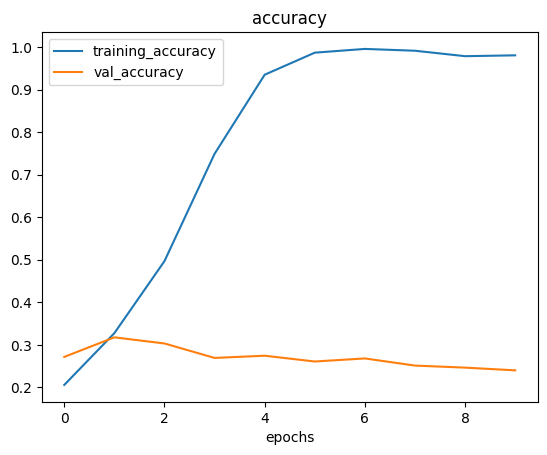

In [ ]:
plot_loss_curves(history_9)

In [ ]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 65s 267ms/step - loss: 2.1266 - accuracy: 0.2467 - val_loss: 2.0169 - val_accuracy: 0.2856
Epoch 2/10
235/235 [==============================] - 63s 269ms/step - loss: 1.7775 - accuracy: 0.3936 - val_loss: 1.9374 - val_accuracy: 0.3208
Epoch 3/10
235/235 [==============================] - 52s 221ms/step - loss: 1.3807 - accuracy: 0.5415 - val_loss: 2.0517 - val_accuracy: 0.3104
Epoch 4/10
235/235 [==============================] - 51s 215ms/step - loss: 0.9157 - accuracy: 0.7075 - val_loss: 2.3021 - val_accuracy: 0.3240
Epoch 5/10
235/235 [==============================] - 51s 216ms/step - loss: 0.5231 - accuracy: 0.8472 - val_loss: 2.7661 - val_accuracy: 0.3140
Epoch 6/10
235/235 [==============================] - 51s 219ms/step - loss: 0.2504 - accuracy: 0.9396 - val_loss: 3.2925 - val_accuracy: 0.2924
Epoch 7/10
235/235 [==============================] - 50s 215ms/step - loss: 0.1184 - accuracy: 0.9773 - val_loss: 3.6069 - val_ac

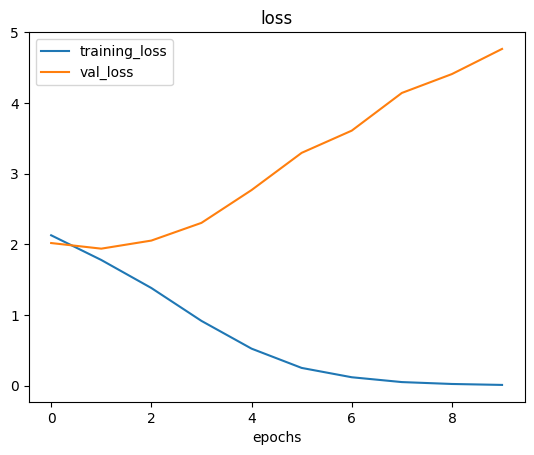

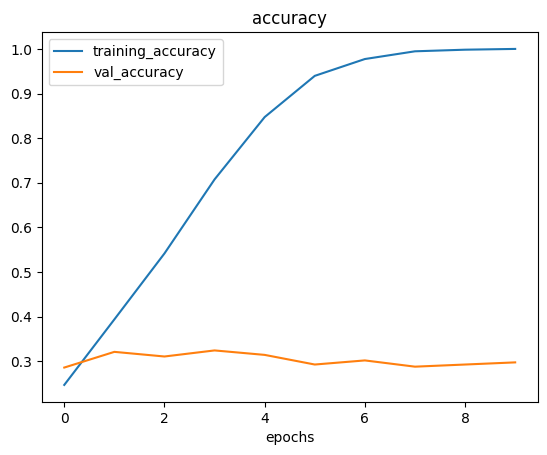

In [ ]:
plot_loss_curves(history_10)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented, 
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/10
235/235 [==============================] - 125s 526ms/step - loss: 2.1756 - accuracy: 0.2221 - val_loss: 1.9972 - val_accuracy: 0.2784
Epoch 2/10
235/235 [==============================] - 123s 522ms/step - loss: 2.0263 - accuracy: 0.2804 - val_loss: 1.8553 - val_accuracy: 0.3564
Epoch 3/10
235/235 [==============================] - 135s 575ms/step - loss: 1.9695 - accuracy: 0.3119 - val_loss: 1.8515 - val_accuracy: 0.3544
Epoch 4/10
235/235 [==============================] - 127s 540ms/step - loss: 1.9393 - accuracy: 0.3207 - val_loss: 1.8066 - val_accuracy: 0.3640
Epoch 5/10
235/235 [==============================] - 137s 582ms/step - loss: 1.9093 - accuracy: 0.3404 - val_loss: 1.8058 - val_accuracy: 0.3752
Epoch 6/10
235/235 [==============================] - 121s 517ms/step - loss: 1.8920 - accuracy: 0.3488 - val_loss: 1.7563 - val_accuracy: 0.3984
Epoch 7/10
235/235 [==============================] - 120s 512ms/step - loss: 1.8620 - accuracy: 0.3621 - val_loss: 1.7443 -

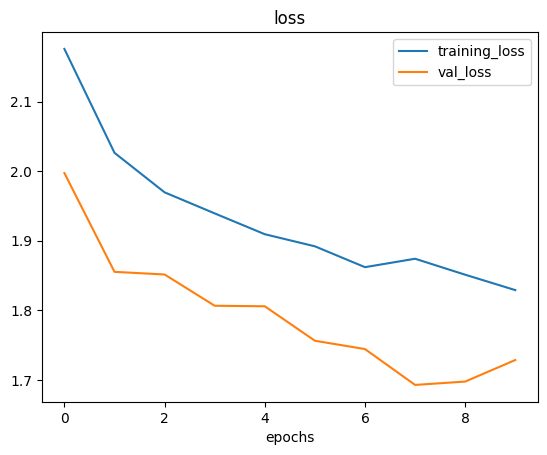

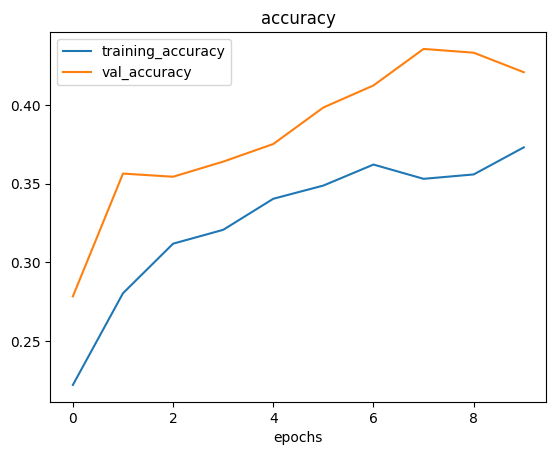

In [ ]:
plot_loss_curves(history_11)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
 
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 56ms/step


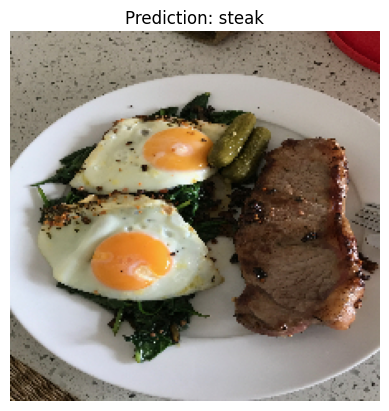

In [ ]:
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


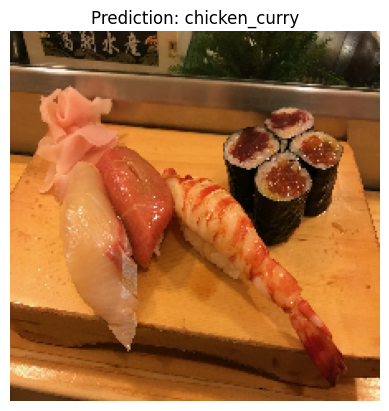

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


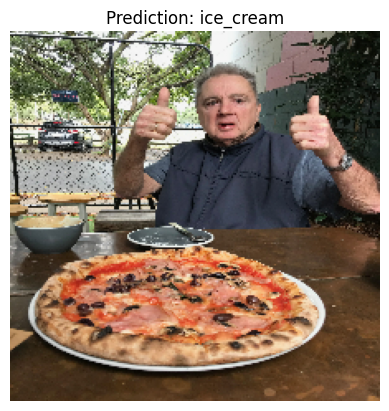

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


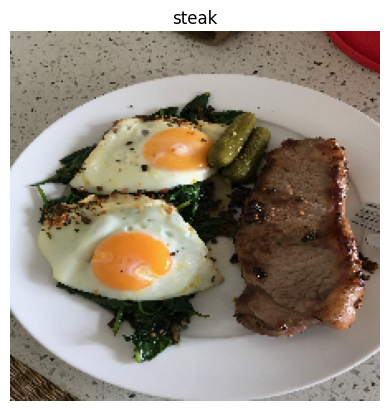

In [ ]:
img = load_and_prep_image("03-steak.jpeg")
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred


1/1 [==============================] - 0s 19ms/step


array([[0.06762614, 0.0780583 , 0.05194521, 0.17612226, 0.04912645,
        0.05844246, 0.0118078 , 0.11893101, 0.2960986 , 0.09184176]],
      dtype=float32)

In [ ]:
class_names[pred.argmax()]

'steak'

1/1 [==============================] - 0s 19ms/step


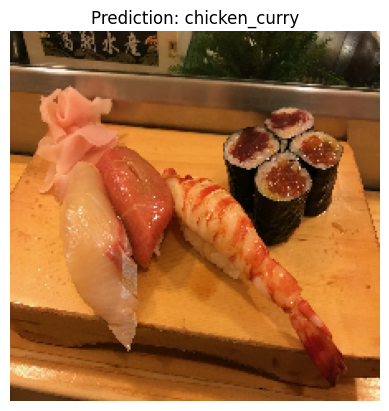

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [ ]:
model_11.save("saved_trained_model")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 14s 168ms/step - loss: 1.7286 - accuracy: 0.4208


[1.7285937070846558, 0.42080000042915344]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 1.7286 - accuracy: 0.4208


[1.7285937070846558, 0.42080000042915344]